# Demonstrate of Pandas for Time Series Plotting

In [1]:
import pandas as pd
import numpy as np
from control import tf, c2d, step_response
import matplotlib.pyplot as plt

In [2]:
np.convolve([2, 1], [4, 1])

array([8, 6, 1])

In [3]:
# Sample time
Ts = 0.5

# Define 2 tranfer functions
tf1 = c2d(tf(1, [5, 1]), Ts)
tf2 = c2d(tf([2 -1], [8, 6, 1]), Ts)

# Simulate both systems
T = Ts*np.arange(0, 50)
T_out, y1_out = step_response(tf1, T)
T_out, y2_out, x2_out = step_response(tf2, T, return_x=True)

In [4]:
x2_out.shape

(2, 50)

In [5]:
# Convert outputs to Pandas series
T = pd.Index(T, name='Time (s)')
y1_out = pd.Series(y1_out, index=T, name='y_1(t)')
y2_out = pd.Series(y2_out, index=T, name='y_2(t)')
x2_out = pd.DataFrame(x2_out.T, index=T, columns=['x_21(t)', 'x_22(t)'])

In [6]:
sim_results = pd.concat([y1_out, y2_out, x2_out], axis=1)
sim_results.head()

,y_1(t),y_2(t),x_21(t),x_22(t)
Time (s),,,,
0.0,0.000000,0.000000,0.000000,0.000000
0.5,0.095163,0.013807,1.000000,0.000000
1.0,0.181269,0.048929,2.661298,-1.000000
1.5,0.259182,0.097788,4.733918,-2.661298
2.0,0.329680,0.154818,7.035366,-4.733918


In [7]:
sim_results.shape

(50, 4)

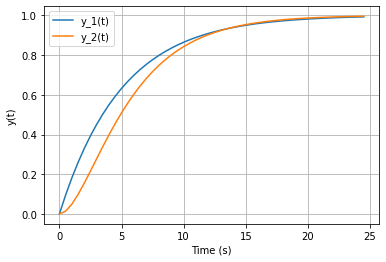

In [8]:
# Both lines on same plot
y1_out.plot()
y2_out.plot()
plt.ylabel('y(t)')
plt.grid()
plt.legend()
plt.show()

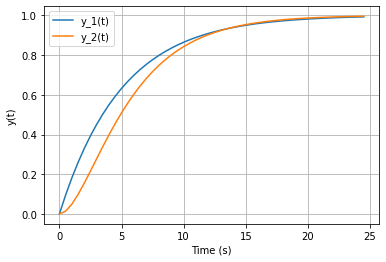

In [9]:
# Or alternatively
sim_results[['y_1(t)', 'y_2(t)']].plot(grid=True)
plt.ylabel('y(t)')
plt.show()

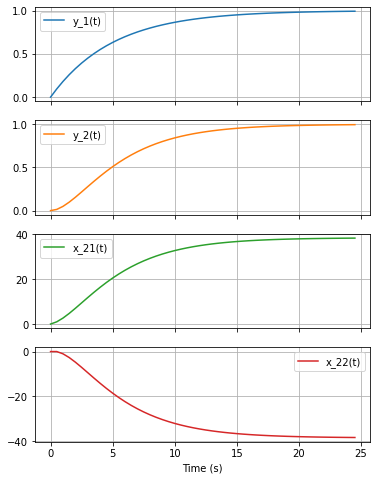

In [10]:
# Separate subplots
sim_results.plot(subplots=True, grid=True, figsize=(6, 8))
plt.show()

## Use of Pandas datetime index

Pandas has sophisitcated time and date indexing but this is arguably less useful for control system design since we don't often work with real data or care about hours, days, months, etc. or what date it is.

In [11]:
# Simulate both systems
Ts = 0.5
K = pd.RangeIndex(0, 50, name='Sample (k)')
T = pd.TimedeltaIndex(Ts*K, unit='s', name='Time')
T_out, y1_out = step_response(tf1, T.total_seconds())
T_out, y2_out = step_response(tf2, T.total_seconds())

data = {
    'System 1': y1_out,
    'System 2': y2_out
}
# Convert outputs straight to Pandas dataframe
sim_results = pd.DataFrame(data, index=T)
sim_results.head()

,System 1,System 2
Time,,
0 days 00:00:00,0.000000,0.000000
0 days 00:00:00.500000,0.095163,0.013807
0 days 00:00:01,0.181269,0.048929
0 days 00:00:01.500000,0.259182,0.097788
0 days 00:00:02,0.329680,0.154818


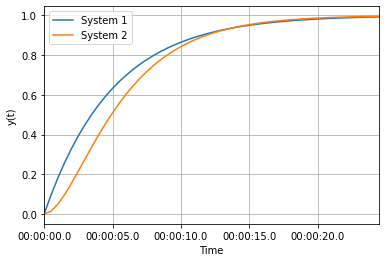

In [12]:
# Both lines on same plot
sim_results.plot(grid=True, ylabel='y(t)')
plt.show()

## Problem: Pandas plotting does not seem to have a step plot option

In [13]:
# ts1.plot(kind='step')  # raises ValueError: step is not a valid plot kind
